In [56]:
from spread_models import dry_forest
import test_data_generator as tdg
import pandas as pd
import numpy as np

In [53]:
# setup the defualt inputs
fuel_params_dict = {
    'FHS_s': 3,
    'FHS_ns': 3,
    'FL_s': 10,
    'FL_ns': 3.5,
    'FL_el': 2,
    'FL_b': 2,
    'FL_o': 4.5,
    # 'FL_total': 12,
    'Fk_s': 0.3,
    'Fk_ns': 0.3,
    'Fk_el': 0.3,
    'Fk_b': 0.3,
    # 'Fk_o': 0.3,
    'Hk_ns': 0.3,
    # 'Cov_o': 40,
    'H_ns': 20,
    'H_el': 2,
    'H_o': 20,
    'WRF_For': 3,
}

fuel_params_df = pd.DataFrame(fuel_params_dict, index=[0])

datetime_param_dict = {
    'datetime': ('2022-01-01', '2022-09-01', 90, 6),
}

num_param_dict = {
    'WindMagKmh_SFC': (10,50,20),
    'RH_SFC': (10,100,50),
    'T_SFC': (10,40,15),
    # 'precipitation': (0,100,50),
    # 'time_since_rain': (0,48,24),
    'time_since_fire': (0,15,7.5),
    'DF_SFC': (2,10,4),
}

class_param_dict = {}

df = tdg.generate_test_data(datetime_param_dict,num_param_dict,class_param_dict)
df['months'] = df.datetime.dt.month
df['hours'] = df.datetime.dt.hour


In [15]:
# # generate outputs
# output_dict =dry_forest.calculate(df.to_xarray(),fuel_params_df.iloc[0])

# for param, series in output_dict.items():
#     df[param] = series

# print(df.head())
# print(df.shape)

    datetime  WindMagKmh_SFC  RH_SFC  T_SFC  time_since_fire  DF_SFC  months  \
0 2022-01-01            10.0    10.0   10.0              0.0     2.0       1   
1 2022-01-01            10.0    10.0   10.0              0.0     6.0       1   
2 2022-01-01            10.0    10.0   10.0              0.0    10.0       1   
3 2022-01-01            10.0    10.0   10.0              7.5     2.0       1   
4 2022-01-01            10.0    10.0   10.0              7.5     6.0       1   

   hours  dead_fuel_moisture  rate_of_spread  flame_height   intensity  \
0      0               4.577       56.648558      1.375288    0.000000   
1      0               4.577       56.648558      1.375288    0.000000   
2      0               4.577       56.648558      1.375288    0.000000   
3      0               4.577       84.660937      1.838878  121.306613   
4      0               4.577      213.271674      3.586383  916.760387   

   spotting_distance  rating_1  index_1  
0          50.000000       0.0  

In [17]:
print(df.shape)

(3888, 8)


In [57]:
# sensitivity to surface fuel load 0 - 2- step of 2
fuel_params_dict_list = []
# for param in range(1.0,4.1,0.5):
for param in np.linspace(1,4,7):
    d = dict(fuel_params_dict)
    # d = d.update(fuel_params_dict)
    d['FHS_s'] = param
    fuel_params_dict_list.append(d)

fuel_params_df = pd.DataFrame(fuel_params_dict_list)
fuel_params_df


,FHS_s,FHS_ns,FL_s,FL_ns,FL_el,FL_b,FL_o,Fk_s,Fk_ns,Fk_el,Fk_b,Hk_ns,H_ns,H_el,H_o,WRF_For
0,1.0,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3
1,1.5,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3
2,2.0,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3
3,2.5,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3
4,3.0,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3
5,3.5,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3
6,4.0,3,10,3.5,2,2,4.5,0.3,0.3,0.3,0.3,0.3,20,2,20,3


In [58]:

output_dict_list = []
for i, row in fuel_params_df.iterrows():
    od = dry_forest.calculate(df.to_xarray(),row)
    output_dict_list.append(od)

# print(output_dict_list)

In [59]:
df_out=pd.DataFrame()
for i, output_dict in enumerate(output_dict_list):
    df_temp = df.copy(deep=True)
    df_temp['FHS_s'] = fuel_params_df['FHS_s'].tolist()[i]
    for param, series in output_dict.items():
        df_temp[param] = series
        
    if df_out.empty:
        df_out = df_temp.copy(deep=True)
    else:
        df_out = pd.concat([df_out, df_temp])
        
df_out.head()
        

,datetime,WindMagKmh_SFC,RH_SFC,T_SFC,time_since_fire,DF_SFC,months,hours,FHS_s,dead_fuel_moisture,rate_of_spread,flame_height,intensity,spotting_distance,rating_1,index_1
0,2022-01-01,10.0,10.0,10.0,0.0,2.0,1,0,1.0,4.577,56.648558,1.375288,0.000000,50.0,0.0,0.0
1,2022-01-01,10.0,10.0,10.0,0.0,6.0,1,0,1.0,4.577,56.648558,1.375288,0.000000,50.0,0.0,0.0
2,2022-01-01,10.0,10.0,10.0,0.0,10.0,1,0,1.0,4.577,56.648558,1.375288,0.000000,50.0,0.0,0.0
3,2022-01-01,10.0,10.0,10.0,7.5,2.0,1,0,1.0,4.577,66.731320,1.548205,95.616121,50.0,0.0,5.0
4,2022-01-01,10.0,10.0,10.0,7.5,6.0,1,0,1.0,4.577,113.023405,2.266098,485.837520,50.0,0.0,9.0


In [48]:
print(df_out.shape)

(42768, 16)


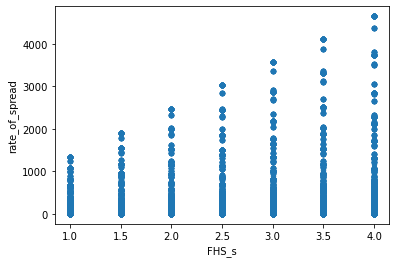

In [61]:
ax = df_out.plot.scatter(x='FHS_s', y='rate_of_spread')